##### Tarea

## Esta es la libreta donde esta los pasos para la elaboración de las grafícas de la tarea Modelación y Evaluación

Lo primero que haremos es importar las bibliotecas que necesitaremos dirante el proceso.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
Instalamos pyxlsb que nos permite abrir archivos xlsb.

In [2]:
!pip install pyxlsb


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Cargamos nuestros datos y los guardamos en un DataFrame.

In [3]:
url = 'https://files.conagua.gob.mx/aguasnacionales/TODOS%20LOS%20MONITOREOS.xlsb'
df = pd.read_excel(url, sheet_name=1)

In [4]:
df.head()

,CLAVE SITIO,CLAVE MONITOREO,NOMBRE DEL SITIO,TIPO CUERPO DE AGUA,FECHA REALIZACIÓN,Año,ALC_FEN,ALC_TOT,CO3,HCO3,...,STV,TALIO_TOT,TER-BUTILBENCENO,Ti_TOT,TRANS-CLORDANO,FORMALDEHIDO,CLORATOS,ACID_CLOROACE,ACID_DICLOROACE,ACID_TRICLOROACE
0,BROTE CARMINA 3,BROTE CARMINA 3-131122,CARMINA 3 BROTE,SUBTERRÁNEO,44873,2022,NaN,139.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CARMINA 2,CARMINA 2-131122,CARMINA 2,LÓTICO,44873,2022,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CAZEPA-1,CAZEPA-1-260921,POZO SAN FERNANDO 1,SUBTERRÁNEO,44462,2021,NaN,148.645,0,148.645,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CAZEPA-1,CAZEPA-1-310722,POZO SAN FERNANDO 1,SUBTERRÁNEO,44769,2022,NaN,141.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CAZEPA-1,CAZEPA-1-181023,POZO SAN FERNANDO 1,SUBTERRÁNEO,45217,2023,0,210.24,0,210.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Para ver el estado donde pertenece cada dato, necesitaremos del siguiente Data Frame

In [5]:
url = 'https://files.conagua.gob.mx/aguasnacionales/TODOS%20LOS%20MONITOREOS.xlsb'
df_1 = pd.read_excel(url)

Para continuar lo que haremos es hacer un merge entre nuestros datos y el Data Frame que contiene las columnas *CLAVE SITIO* y *ESTADO*, la columna clave de sitio es la indicadora de ambos Data Frames

In [6]:
df_2 = pd.merge(df,df_1[['CLAVE SITIO','ESTADO']], how='inner')

A continuación nos enfocaremos solamente en los cuerpos de agua superficiales, tenemos 4 cuarpos de agua Léntico, Lótico, Costero y Subterraneo, de ellos solamente el subterraneo no es superficial.

In [7]:
df_2 = df_2[df_2['TIPO CUERPO DE AGUA'] != 'SUBTERRÁNEO']

In [8]:
df_2.head()

,CLAVE SITIO,CLAVE MONITOREO,NOMBRE DEL SITIO,TIPO CUERPO DE AGUA,FECHA REALIZACIÓN,Año,ALC_FEN,ALC_TOT,CO3,HCO3,...,TALIO_TOT,TER-BUTILBENCENO,Ti_TOT,TRANS-CLORDANO,FORMALDEHIDO,CLORATOS,ACID_CLOROACE,ACID_DICLOROACE,ACID_TRICLOROACE,ESTADO
1,CARMINA 2,CARMINA 2-131122,CARMINA 2,LÓTICO,44873,2022,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COAHUILA DE ZARAGOZA
33,DLAGU0001RNL21,DLAGU0001RNL21-150621,PRESA NATILLAS DE ABAJO,LÉNTICO,44362,2021,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AGUASCALIENTES
34,DLAGU0002RNL21,DLAGU0002RNL21-140721,PRESA EL JOCOQUI,LÉNTICO,44391,2021,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AGUASCALIENTES
35,DLAGU0003RNL21,DLAGU0003RNL21-90921,BORDO SANTA ELENA CORTINA,LÉNTICO,44448,2021,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AGUASCALIENTES
36,DLAGU0004RNL21,DLAGU0004RNL21-90921,HUMEDAL BUENAVISA DE PEÑUELAS CHARCA NO. 5,LÉNTICO,44448,2021,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AGUASCALIENTES


Escogemos los 12 datos que nos interesan

In [9]:
df_3 = df_2[['NOMBRE DEL SITIO','TIPO CUERPO DE AGUA','ESTADO','Año','SST','COLI_FEC','E_COLI','DBO_TOT','DQO_TOT','ENTEROC_FEC','OD_%','TOX_D_48_UT',
 'TOX_D_48_SUP_UT',
 'TOX_D_48_FON_UT',
 'TOX_FIS_SUP_15_UT',
 'TOX_FIS_SUP_30_UT',
 'TOX_FIS_SUP_5_UT',
 'TOX_FIS_FON_15_UT',
 'TOX_FIS_FON_30_UT',
 'TOX_FIS_FON_5_UT',
 'TOX_V_15_UT',
 'TOX_V_30_UT',
 'TOX_V_5_UT']]
df_3.head()

,NOMBRE DEL SITIO,TIPO CUERPO DE AGUA,ESTADO,Año,SST,COLI_FEC,E_COLI,DBO_TOT,DQO_TOT,ENTEROC_FEC,...,TOX_D_48_FON_UT,TOX_FIS_SUP_15_UT,TOX_FIS_SUP_30_UT,TOX_FIS_SUP_5_UT,TOX_FIS_FON_15_UT,TOX_FIS_FON_30_UT,TOX_FIS_FON_5_UT,TOX_V_15_UT,TOX_V_30_UT,TOX_V_5_UT
1,CARMINA 2,LÓTICO,COAHUILA DE ZARAGOZA,2022,<10,1076,41,<2,<10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,<1,NaN
33,PRESA NATILLAS DE ABAJO,LÉNTICO,AGUASCALIENTES,2021,50,NaN,NaN,23.2,48,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,PRESA EL JOCOQUI,LÉNTICO,AGUASCALIENTES,2021,<10,NaN,NaN,4.86,18,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,BORDO SANTA ELENA CORTINA,LÉNTICO,AGUASCALIENTES,2021,32,NaN,NaN,6.6,189,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,HUMEDAL BUENAVISA DE PEÑUELAS CHARCA NO. 5,LÉNTICO,AGUASCALIENTES,2021,22,NaN,NaN,9.3,60,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_3.columns = ['NOMBRE DEL SITIO','TIPO CUERPO DE AGUA','ESTADO','Año','SST','COLI_FEC','E_COLI','DBO_TOT','DQO_TOT','ENTEROC_FEC','OD_%','TOX_1',
                'TOX_2','TOX_3','TOX_4','TOX_5','TOX_6','TOX_7','TOX_8','TOX_9','TOX_10','TOX_11','TOX_12']

Lo que hacemos a continuacion es escoger los elementos que no sean valor numerico de las columnas de nuestro Data Frame y así remplazarlas por valores numéricos.

In [11]:
lista1 = list(set([elemento for elemento in df_3['SST'].tolist() if not isinstance(elemento, (int, float))]))
lista2 = list(set([elemento for elemento in df_3['COLI_FEC'].tolist() if not isinstance(elemento, (int, float))]))
lista3 = list(set([elemento for elemento in df_3['DBO_TOT'].tolist() if not isinstance(elemento, (int, float))]))
lista4 = list(set([elemento for elemento in df_3['DQO_TOT'].tolist() if not isinstance(elemento, (int, float))]))
lista5 = list(set([elemento for elemento in df_3['ENTEROC_FEC'].tolist() if not isinstance(elemento, (int, float))]))
lista6 = list(set([elemento for elemento in df_3['OD_%'].tolist() if not isinstance(elemento, (int, float))]))
lista7 = list(set([elemento for elemento in df_3['TOX_1'].tolist() if not isinstance(elemento, (int, float))]))
lista8 = list(set([elemento for elemento in df_3['TOX_2'].tolist() if not isinstance(elemento, (int, float))]))
lista9 = list(set([elemento for elemento in df_3['TOX_3'].tolist() if not isinstance(elemento, (int, float))]))
lista10 = list(set([elemento for elemento in df_3['TOX_4'].tolist() if not isinstance(elemento, (int, float))]))
lista11 = list(set([elemento for elemento in df_3['TOX_5'].tolist() if not isinstance(elemento, (int, float))]))
lista12 = list(set([elemento for elemento in df_3['TOX_6'].tolist() if not isinstance(elemento, (int, float))]))
lista13 = list(set([elemento for elemento in df_3['TOX_7'].tolist() if not isinstance(elemento, (int, float))]))
lista14 = list(set([elemento for elemento in df_3['TOX_8'].tolist() if not isinstance(elemento, (int, float))]))
lista15 = list(set([elemento for elemento in df_3['TOX_9'].tolist() if not isinstance(elemento, (int, float))]))
lista16 = list(set([elemento for elemento in df_3['TOX_10'].tolist() if not isinstance(elemento, (int, float))]))
lista17 = list(set([elemento for elemento in df_3['TOX_11'].tolist() if not isinstance(elemento, (int, float))]))
lista18 = list(set([elemento for elemento in df_3['TOX_12'].tolist() if not isinstance(elemento, (int, float))]))
lista19 = list(set([elemento for elemento in df_3['E_COLI'].tolist() if not isinstance(elemento, (int, float))]))

lista = list(set(lista1 + lista2 + lista3 + lista4 + lista5 + lista6 + lista7 + lista8 + lista9 + lista10 + lista11 + lista12 + lista13 + lista14 +
                 lista15 + lista16 + lista17 + lista18 + lista19))

In [12]:
cambio = {'>2400':2401,
 '<30':29,
 '<2':1,
 '>2419.6': 2420,
 '<100':99,
 '<16':15,
 '>300':301,
 '≥2400000000000':2400000000000,
 '<1':.1,
 '>24000':24001,
 '<10000':9999,
 '≥ 2400':2401,
 '>2419600':2419601,
 '<1000':999,
 '>24196000':24196001,
 '>24000                    ':24001,
 '>3':4,
 '<20':19,
 '>240000':240001,
 '<10':9,
 '>20000000':20000001,
 '<No es LDM, es LPC':0,
 '>2419':2420,
 '>24196':24197,
 '<3':2,
 '<5':4,
 '>241960':241961,
 '>100':101,
 '<2400':2399,
 '>150':151,
 '>10':11}


In [13]:
df_3 = df_3.replace(cambio)

C:\Users\jesol\AppData\Local\Temp\ipykernel_19488\1643219414.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_3 = df_3.replace(cambio)


Eliminamos las filas que no tengan ningun valor dado en los 8 datos que nos interesan.

In [14]:
df_3 = df_3.dropna(subset=df_3.columns[4:], how='all')

Usando la clasificacion de datos dada en la misma pagina, podemos dar las condiciones para saber cuando un cuerpo de agua está contaminada, limpia o nilimpia ni contaminada, para eso agregaremos una columna llamada *SEMAFORO*.

In [15]:
opciones = ['Verde','Amarillo','Rojo']

condiciones_tox_1 = [
    (df_3['TOX_1'] < 1),
    (df_3['TOX_1'] >= 1) & (df_3['TOX_1'] < 5),
    (df_3['TOX_1'] >= 5)
]

condiciones_tox_2 = [
    (df_3['TOX_2'] <= 1),
    (df_3['TOX_2'] >= 1) & (df_3['TOX_2'] < 5),
    (df_3['TOX_2'] >= 5)
]

condiciones_tox_3 = [
    (df_3['TOX_3'] < 1),
    (df_3['TOX_3'] >= 1) & (df_3['TOX_3'] < 5),
    (df_3['TOX_3'] >= 5)
]

condiciones_tox_4 = [
    (df_3['TOX_4'] < 1),
    (df_3['TOX_4'] >= 1) & (df_3['TOX_4'] < 5),
    (df_3['TOX_4'] >= 5)
]

condiciones_tox_5 = [
    (df_3['TOX_5'] < 1),
    (df_3['TOX_5'] >= 1) & (df_3['TOX_5'] < 5),
    (df_3['TOX_5'] >= 5)
]

condiciones_tox_6 = [
    (df_3['TOX_6'] < 1),
    (df_3['TOX_6'] >= 1) & (df_3['TOX_6'] < 5),
    (df_3['TOX_6'] >= 5)
]

condiciones_tox_7 = [
    (df_3['TOX_7'] < 1),
    (df_3['TOX_7'] >= 1) & (df_3['TOX_7'] < 5),
    (df_3['TOX_7'] >= 5)
]

condiciones_tox_8 = [
    (df_3['TOX_8'] < 1),
    (df_3['TOX_8'] >= 1) & (df_3['TOX_8'] < 5),
    (df_3['TOX_8'] >= 5)
]

condiciones_tox_9 = [
    (df_3['TOX_9'] < 1),
    (df_3['TOX_9'] >= 1) & (df_3['TOX_9'] < 5),
    (df_3['TOX_9'] >= 5)
]

condiciones_tox_10 = [
    (df_3['TOX_10'] < 1),
    (df_3['TOX_10'] >= 1) & (df_3['TOX_10'] < 5),
    (df_3['TOX_10'] >= 5)
]


condiciones_tox_11 = [
    (df_3['TOX_11'] < 1),
    (df_3['TOX_11'] >= 150) & (df_3['TOX_11'] < 5),
    (df_3['TOX_11'] >= 5)
]
condiciones_tox_12 = [
    (df_3['TOX_12'] < 1),
    (df_3['TOX_12'] >= 1) & (df_3['TOX_12'] < 5),
    (df_3['TOX_12'] >= 5)
]

condiciones_e_coli = [
    (df_3['E_COLI'] <= 576),
    (df_3['E_COLI'] > 576) & (df_3['E_COLI'] <= 850),
    (df_3['E_COLI'] > 850)
]

condiciones_coli_fec = [
    (df_3['COLI_FEC'] <= 100),
    (df_3['COLI_FEC'] > 100) & (df_3['COLI_FEC'] <= 200),
    (df_3['COLI_FEC'] > 200)
]

condiciones_dbo_tot = [
    (df_3['DBO_TOT'] <= 6),
    (df_3['DBO_TOT'] > 6) & (df_3['DBO_TOT'] <= 30),
    (df_3['DBO_TOT'] > 30)
]

condiciones_dqo_tot = [
    (df_3['DQO_TOT'] <= 20),
    (df_3['DQO_TOT'] > 20) & (df_3['DBO_TOT'] <= 40),
    (df_3['DQO_TOT'] > 40)
]


condiciones_od = [
    (df_3['OD_%'] <= 120),
    (df_3['OD_%'] > 120) & (df_3['OD_%'] <= 130),
    (df_3['OD_%'] > 130)
]

condiciones_sst = [
    (df_3['SST'] <= 75),
    (df_3['SST'] > 75) & (df_3['SST'] <= 150),
    (df_3['SST'] > 150)
]

condiciones_enteroc_fec = [
    (df_3['ENTEROC_FEC'] <= 150),
    (df_3['ENTEROC_FEC'] > 150) & (df_3['ENTEROC_FEC'] <= 300),
    (df_3['ENTEROC_FEC'] > 300)
]


condiciones =[['SST',condiciones_sst],['COLI_FEC',condiciones_coli_fec],['E_COLI', condiciones_e_coli],['DBO_TOT',condiciones_dbo_tot],
              ['DQO_TOT',condiciones_dqo_tot],['ENTEROC_FEC',condiciones_enteroc_fec],['OD_%',condiciones_od],
               ['TOX_1',condiciones_tox_1],['TOX_2',condiciones_tox_2],['TOX_3',condiciones_tox_3],['TOX_4',condiciones_tox_4],
              ['TOX_5',condiciones_tox_5],['TOX_6',condiciones_tox_6],['TOX_7',condiciones_tox_7],['TOX_8',condiciones_tox_8],
              ['TOX_9',condiciones_tox_9],['TOX_10',condiciones_tox_10],['TOX_11',condiciones_tox_11],['TOX_12',condiciones_tox_12]]

In [16]:
for i in range(len(condiciones)):
  df_3[condiciones[i][0]] = np.select(
    condiciones[i][1],
    opciones,
    default=df_3[condiciones[i][0]]
  )

In [17]:
df_3.head()

,NOMBRE DEL SITIO,TIPO CUERPO DE AGUA,ESTADO,Año,SST,COLI_FEC,E_COLI,DBO_TOT,DQO_TOT,ENTEROC_FEC,...,TOX_3,TOX_4,TOX_5,TOX_6,TOX_7,TOX_8,TOX_9,TOX_10,TOX_11,TOX_12
1,CARMINA 2,LÓTICO,COAHUILA DE ZARAGOZA,2022,Verde,Rojo,Verde,Verde,Verde,nan,...,nan,nan,nan,nan,nan,nan,nan,Verde,Verde,nan
33,PRESA NATILLAS DE ABAJO,LÉNTICO,AGUASCALIENTES,2021,Verde,nan,nan,Amarillo,Amarillo,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
34,PRESA EL JOCOQUI,LÉNTICO,AGUASCALIENTES,2021,Verde,nan,nan,Verde,Verde,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
35,BORDO SANTA ELENA CORTINA,LÉNTICO,AGUASCALIENTES,2021,Verde,nan,nan,Amarillo,Amarillo,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
36,HUMEDAL BUENAVISA DE PEÑUELAS CHARCA NO. 5,LÉNTICO,AGUASCALIENTES,2021,Verde,nan,nan,Amarillo,Amarillo,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [18]:
df_3.replace('nan', np.nan, inplace=True)
df_3 = df_3.reset_index(drop=True)

In [19]:
df_3.head()

,NOMBRE DEL SITIO,TIPO CUERPO DE AGUA,ESTADO,Año,SST,COLI_FEC,E_COLI,DBO_TOT,DQO_TOT,ENTEROC_FEC,...,TOX_3,TOX_4,TOX_5,TOX_6,TOX_7,TOX_8,TOX_9,TOX_10,TOX_11,TOX_12
0,CARMINA 2,LÓTICO,COAHUILA DE ZARAGOZA,2022,Verde,Rojo,Verde,Verde,Verde,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Verde,Verde,NaN
1,PRESA NATILLAS DE ABAJO,LÉNTICO,AGUASCALIENTES,2021,Verde,NaN,NaN,Amarillo,Amarillo,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PRESA EL JOCOQUI,LÉNTICO,AGUASCALIENTES,2021,Verde,NaN,NaN,Verde,Verde,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BORDO SANTA ELENA CORTINA,LÉNTICO,AGUASCALIENTES,2021,Verde,NaN,NaN,Amarillo,Amarillo,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,HUMEDAL BUENAVISA DE PEÑUELAS CHARCA NO. 5,LÉNTICO,AGUASCALIENTES,2021,Verde,NaN,NaN,Amarillo,Amarillo,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
conditions = [
    (df_3['DBO_TOT'] == 'Rojo') | (df_3['DQO_TOT'] == 'Rojo') | (df_3['ENTEROC_FEC'] == 'Rojo') |
    (df_3['TOX_1'] == 'Rojo') | (df_3['TOX_2'] == 'Rojo') | (df_3['TOX_3'] == 'Rojo') | (df_3['TOX_4'] == 'Rojo') |
    (df_3['TOX_5'] == 'Rojo') | (df_3['TOX_6'] == 'Rojo') | (df_3['TOX_7'] == 'Rojo') | (df_3['TOX_8'] == 'Rojo') |
    (df_3['TOX_9'] == 'Rojo') | (df_3['TOX_10'] == 'Rojo') | (df_3['TOX_11'] == 'Rojo') | (df_3['TOX_12'] == 'Rojo')|
    (df_3['DBO_TOT'] == 'Amarillo') | (df_3['DQO_TOT'] == 'Amarillo') | (df_3['ENTEROC_FEC'] == 'Amarillo') |
    (df_3['TOX_1'] == 'Amarillo') | (df_3['TOX_2'] == 'Amarillo') | (df_3['TOX_3'] == 'Amarillo') | (df_3['TOX_4'] == 'Amarillo') |
    (df_3['TOX_5'] == 'Amarillo') | (df_3['TOX_6'] == 'Amarillo') | (df_3['TOX_7'] == 'Amarillo') | (df_3['TOX_8'] == 'Amarillo') |
    (df_3['TOX_9'] == 'Amarillo') | (df_3['TOX_10'] == 'Amarillo') | (df_3['TOX_11'] == 'Amarillo') | (df_3['TOX_12'] == 'Amarillo'),

    (df_3['E_COLI'] == 'Amarillo') | (df_3['SST'] == 'Amarillo') | (df_3['OD_%'] == 'Amarillo') | (df_3['COLI_FEC'] == 'Amarillo')
]



options = ['Rojo', 'Amarillo']

df_3['SEMAFORO'] = np.select(conditions, options, default='Verde')

In [21]:
df_3.head()

,NOMBRE DEL SITIO,TIPO CUERPO DE AGUA,ESTADO,Año,SST,COLI_FEC,E_COLI,DBO_TOT,DQO_TOT,ENTEROC_FEC,...,TOX_4,TOX_5,TOX_6,TOX_7,TOX_8,TOX_9,TOX_10,TOX_11,TOX_12,SEMAFORO
0,CARMINA 2,LÓTICO,COAHUILA DE ZARAGOZA,2022,Verde,Rojo,Verde,Verde,Verde,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Verde,Verde,NaN,Verde
1,PRESA NATILLAS DE ABAJO,LÉNTICO,AGUASCALIENTES,2021,Verde,NaN,NaN,Amarillo,Amarillo,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rojo
2,PRESA EL JOCOQUI,LÉNTICO,AGUASCALIENTES,2021,Verde,NaN,NaN,Verde,Verde,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Verde
3,BORDO SANTA ELENA CORTINA,LÉNTICO,AGUASCALIENTES,2021,Verde,NaN,NaN,Amarillo,Amarillo,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rojo
4,HUMEDAL BUENAVISA DE PEÑUELAS CHARCA NO. 5,LÉNTICO,AGUASCALIENTES,2021,Verde,NaN,NaN,Amarillo,Amarillo,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rojo


In [22]:
df_oficial = df_3[['ESTADO','Año','SEMAFORO']]
df_oficial.head()

,ESTADO,Año,SEMAFORO
0,COAHUILA DE ZARAGOZA,2022,Verde
1,AGUASCALIENTES,2021,Rojo
2,AGUASCALIENTES,2021,Verde
3,AGUASCALIENTES,2021,Rojo
4,AGUASCALIENTES,2021,Rojo


In [23]:
estados = df_oficial['ESTADO'].unique()
anios = np.arange(2012, 2024)

df_completo = pd.MultiIndex.from_product([estados, anios], names=['ESTADO', 'Año']).to_frame(index=False)

df_pivot = df_oficial.pivot_table(index=['ESTADO', 'Año'], columns='SEMAFORO', aggfunc='size', fill_value=0).reset_index()

df_pivot.columns.name = None
df_pivot.columns = ['ESTADO', 'Año', 'Verde', 'Amarillo', 'Rojo']


df_final = pd.merge(df_completo, df_pivot, on=['ESTADO', 'Año'], how='left').fillna(0)


df_final[['Verde', 'Amarillo', 'Rojo']] = df_final[['Verde', 'Amarillo', 'Rojo']].astype(int)

In [24]:
df_final.head()

,ESTADO,Año,Verde,Amarillo,Rojo
0,COAHUILA DE ZARAGOZA,2012,2,14,15
1,COAHUILA DE ZARAGOZA,2013,13,101,142
2,COAHUILA DE ZARAGOZA,2014,9,118,99
3,COAHUILA DE ZARAGOZA,2015,16,78,134
4,COAHUILA DE ZARAGOZA,2016,13,86,127


In [25]:
df_final['Contaminada Sonora'] = df_final['Rojo'] + df_final['Amarillo']

# Agrupamos por 'año' y sumamos los valores de 'suma_rojo_amarillo'
df_resultado = df_final.groupby('Año')['Contaminada Sonora'].sum().reset_index()

# Renombrar la columna para mayor claridad
df_resultado.columns = ['Año', 'Contaminada']

df_resultado

,Año,Contaminada
0,2012,4404
1,2013,16322
2,2014,15368
3,2015,15110
4,2016,14762
5,2017,14972
6,2018,16081
7,2019,3173
8,2020,3196
9,2021,824


In [26]:
df_sonora = df_final[df_final['ESTADO'] == 'SONORA'].reset_index(drop=True)
df_sonora

,ESTADO,Año,Verde,Amarillo,Rojo,Contaminada Sonora
0,SONORA,2012,17,59,66,125
1,SONORA,2013,57,443,260,703
2,SONORA,2014,52,392,251,643
3,SONORA,2015,60,241,389,630
4,SONORA,2016,73,219,405,624
5,SONORA,2017,65,264,351,615
6,SONORA,2018,59,237,386,623
7,SONORA,2019,7,34,33,67
8,SONORA,2020,14,37,86,123
9,SONORA,2021,0,9,11,20


In [27]:
lista_1 = list(range(2012,2024))
lista_1
lista_2 = []
for i in lista_1:
    lista_2.append(len(df_3[df_3['Año']==i]))

lista_2

[4668, 17488, 16415, 16381, 16005, 15998, 17043, 3342, 3370, 837, 1697, 594]

In [28]:
df_resultado['Contaminada porcentaje'] = df_resultado['Contaminada'] / lista_2

In [29]:
df_resultado

,Año,Contaminada,Contaminada porcentaje
0,2012,4404,0.943445
1,2013,16322,0.933326
2,2014,15368,0.936217
3,2015,15110,0.922410
4,2016,14762,0.922337
5,2017,14972,0.935867
6,2018,16081,0.943555
7,2019,3173,0.949431
8,2020,3196,0.948368
9,2021,824,0.984468


In [30]:
lista_3 = []
for i in lista_1:
    lista_3.append(len(df_3[(df_3['Año']==i) & (df_3['ESTADO']=='SONORA')]))

lista_3

[142, 760, 695, 690, 697, 680, 682, 74, 137, 20, 68, 7]

In [31]:
df_sonora['Contaminada Sonora porcentaje'] = df_sonora['Contaminada Sonora']/lista_3

df_sonora[['Año','Contaminada Sonora porcentaje']]

,Año,Contaminada Sonora porcentaje
0,2012,0.880282
1,2013,0.925000
2,2014,0.925180
3,2015,0.913043
4,2016,0.895265
5,2017,0.904412
6,2018,0.913490
7,2019,0.905405
8,2020,0.897810
9,2021,1.000000


In [32]:
df_comp = pd.concat([df_resultado[['Año', 'Contaminada porcentaje']],df_sonora[['Contaminada Sonora porcentaje']]],axis=1)
df_comp

,Año,Contaminada porcentaje,Contaminada Sonora porcentaje
0,2012,0.943445,0.880282
1,2013,0.933326,0.925000
2,2014,0.936217,0.925180
3,2015,0.922410,0.913043
4,2016,0.922337,0.895265
5,2017,0.935867,0.904412
6,2018,0.943555,0.913490
7,2019,0.949431,0.905405
8,2020,0.948368,0.897810
9,2021,0.984468,1.000000


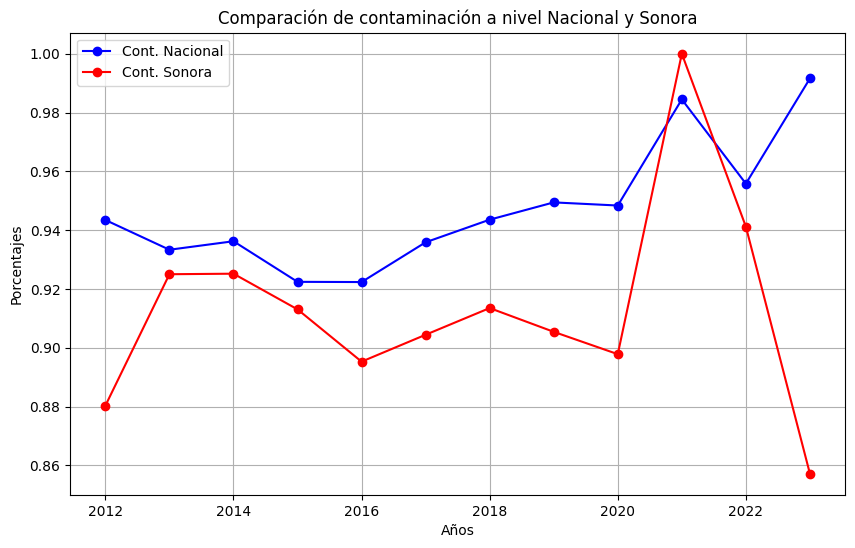

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(df_comp['Año'], df_comp['Contaminada porcentaje'], marker='o', label='Cont. Nacional', color='blue')

# Graficar porcentaje2
plt.plot(df_comp['Año'], df_comp['Contaminada Sonora porcentaje'], marker='o', label='Cont. Sonora', color='red')
plt.xlabel('Años')
plt.ylabel('Porcentajes')
plt.title('Comparación de contaminación a nivel Nacional y Sonora')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
df_sonora_final = df_sonora[['Año', 'Verde','Amarillo','Rojo']]
df_sonora_final['Verde'] = df_sonora_final['Verde'] / df_sonora[['Verde', 'Amarillo', 'Rojo']].sum(axis=1)
df_sonora_final['Amarillo'] = df_sonora_final['Amarillo']  / df_sonora[['Verde', 'Amarillo', 'Rojo']].sum(axis=1)
df_sonora_final['Rojo'] = df_sonora_final['Rojo']  / df_sonora[['Verde', 'Amarillo', 'Rojo']].sum(axis=1)
df_sonora_final


C:\Users\jesol\AppData\Local\Temp\ipykernel_19488\3837282502.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sonora_final['Verde'] = df_sonora_final['Verde'] / df_sonora[['Verde', 'Amarillo', 'Rojo']].sum(axis=1)
C:\Users\jesol\AppData\Local\Temp\ipykernel_19488\3837282502.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sonora_final['Amarillo'] = df_sonora_final['Amarillo']  / df_sonora[['Verde', 'Amarillo', 'Rojo']].sum(axis=1)
C:\Users\jesol\AppData\Local\Temp\ipykernel_19488\3837282502.py:4

,Año,Verde,Amarillo,Rojo
0,2012,0.119718,0.415493,0.464789
1,2013,0.075000,0.582895,0.342105
2,2014,0.074820,0.564029,0.361151
3,2015,0.086957,0.349275,0.563768
4,2016,0.104735,0.314204,0.581062
5,2017,0.095588,0.388235,0.516176
6,2018,0.086510,0.347507,0.565982
7,2019,0.094595,0.459459,0.445946
8,2020,0.102190,0.270073,0.627737
9,2021,0.000000,0.450000,0.550000


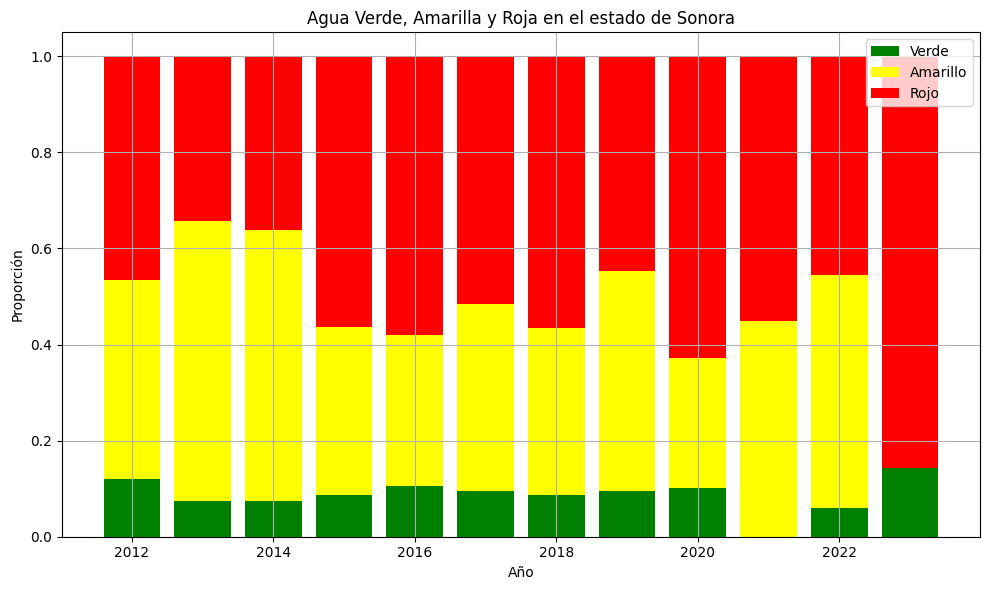

In [35]:
plt.figure(figsize=(10, 6))

# Establecer los años como el eje x
x = df_sonora_final['Año']

# Crear las barras apiladas
plt.bar(x, df_sonora_final['Verde'], color='green', label='Verde')
plt.bar(x, df_sonora_final['Amarillo'], bottom=df_sonora_final['Verde'], color='yellow', label='Amarillo')
plt.bar(x, df_sonora_final['Rojo'], bottom=df_sonora_final['Verde'] + df_sonora_final['Amarillo'], color='red', label='Rojo')

# Añadir etiquetas y título
plt.xlabel('Año')
plt.ylabel('Proporción')
plt.title('Agua Verde, Amarilla y Roja en el estado de Sonora')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.tight_layout()
plt.show()